optimal stopping: https://en.wikipedia.org/wiki/Optimal_stopping
odds algo: https://en.wikipedia.org/wiki/Odds_algorithm

Tutorials on python packages:
https://www.quora.com/Using-Python-whats-the-best-way-to-get-stock-data
https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

In [68]:
#from pandas_datareader import data
#import fix_yahoo_finance as yf  
import matplotlib.pyplot as plt
import quandl
import pandas as pd
import datetime

In [69]:
now = datetime.datetime.now()
today = now.strftime("%Y-%m-%d")

In [70]:
# wiki dataset: https://www.quandl.com/databases/WIKIP/documentation
    
tickers = ["WIKI/ebay", "WIKI/PYPL"]
ticker = "WIKI/ebay"
ticker1 = "WIKI/PYPL"
start_date = '2010-01-01'
end_date = today
api_key = '8aXL5FDq4eo5REVdCpoF'

ticker_data = pd.DataFrame()
for ticker in tickers:
    df = quandl.get(ticker, start_date=start_date, end_date=end_date, api_key=api_key)
    df["Ticker"] = ticker
    print("shape: {}, columns: {}".format(df.shape, df.columns))
    ticker_data = ticker_data.append(df)
    

shape: (2071, 13), columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'Ticker'],
      dtype='object')
shape: (677, 13), columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'Ticker'],
      dtype='object')


In [71]:
ticker_data['Ticker'].value_counts()

WIKI/ebay    2071
WIKI/PYPL     677
Name: Ticker, dtype: int64

In [72]:
"""ticker_data.set_index(['Ticker'], append=True, inplace=True)
ticker_data.head(3)"""

"ticker_data.set_index(['Ticker'], append=True, inplace=True)\nticker_data.head(3)"

In [73]:
"""# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = ticker_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
temp = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
temp = temp.fillna(method='ffill')"""

"# Getting just the adjusted closing prices. This will return a Pandas DataFrame\n# The index in this DataFrame is the major index of the panel_data.\nclose = ticker_data['Close']\n\n# Getting all weekdays between 01/01/2000 and 12/31/2016\nall_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')\n\n# How do we align the existing prices in adj_close with our new set of dates?\n# All we need to do is reindex close using all_weekdays as the new index\ntemp = close.reindex(all_weekdays)\n\n# Reindexing will insert missing values (NaN) for the dates that were not present\n# in the original set. To cope with this, we can fill the missing by replacing them\n# with the latest available price for each instrument.\ntemp = temp.fillna(method='ffill')"

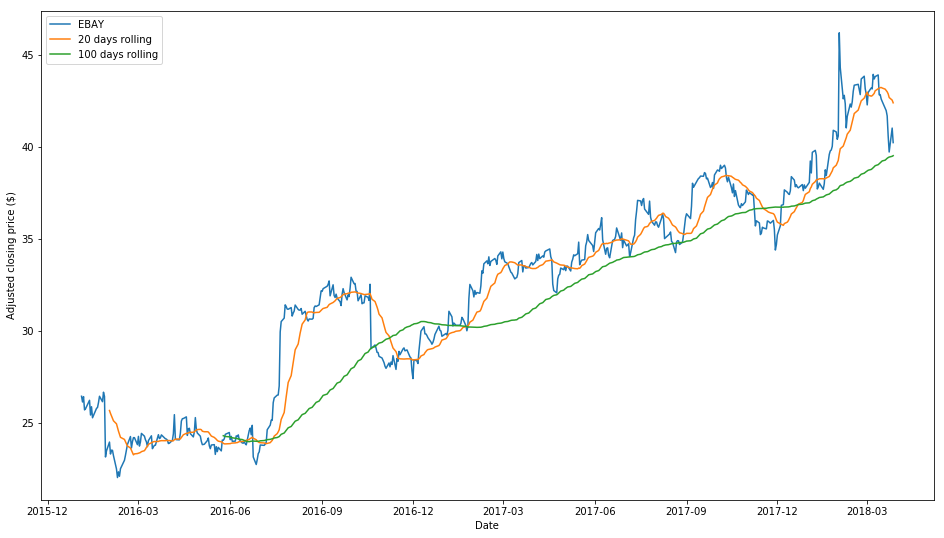

In [78]:
# Get the company timeseries. This now returns a Pandas Series object indexed by date.
start_date = '2016-01-01'
ebay = ticker_data.loc[ (ticker_data['Ticker']=='WIKI/ebay') &
                       (ticker_data.index>start_date), 'Adj. Close']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_ebay = ebay.rolling(window=20).mean()
long_rolling_ebay = ebay.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(ebay.index, ebay, label='EBAY')
ax.plot(short_rolling_ebay.index, short_rolling_ebay, label='20 days rolling')
ax.plot(long_rolling_ebay.index, long_rolling_ebay, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

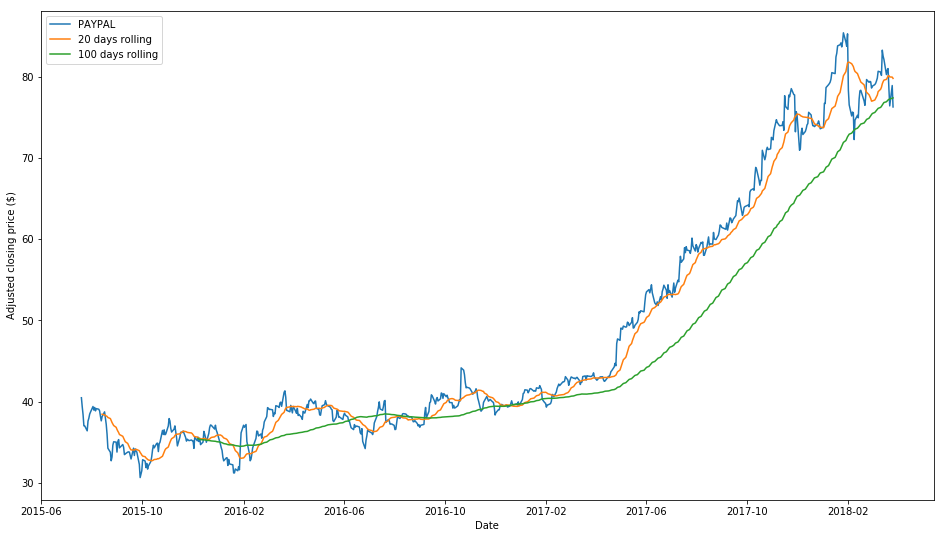

In [82]:
start_date = '2010-01-01'
paypal = ticker_data.loc[ (ticker_data['Ticker']=='WIKI/PYPL') &
                       (ticker_data.index>start_date), 'Adj. Close']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_paypal = paypal.rolling(window=20).mean()
long_rolling_paypal = paypal.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig1, ax1 = plt.subplots(figsize=(16,9))

ax1.plot(paypal.index, paypal, label='PAYPAL')
ax1.plot(short_rolling_paypal.index, short_rolling_paypal, label='20 days rolling')
ax1.plot(long_rolling_paypal.index, long_rolling_paypal, label='100 days rolling')

ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted closing price ($)')
ax1.legend()